In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc


### (a) Data Processing

1. Download and read the data

In [34]:
# 1. Download and read the data
train_data = pd.read_csv('data_train.csv')
train_data = train_data.apply(pd.to_numeric, errors='raise')

2. Print the first 5 rows of the data 

In [35]:
train_data = train_data.drop(train_data.columns[0], axis=1)
print(train_data.head())

   PT08.S1(CO)  NMHC(GT)  C6H6(GT)  PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  \
0        797.0    -200.0       2.1          593.0    146.0        1212.0   
1       1282.0    -200.0      11.0         1013.0    354.0         545.0   
2        891.0    -200.0       7.6          882.0    342.0         885.0   
3       1285.0    -200.0      18.1         1243.0    481.0         599.0   
4        892.0    -200.0       7.3          869.0     71.0         953.0   

   NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)     T    RH      AH  
0     72.0         984.0        494.0  10.8  49.7  0.6429  
1    141.0        1384.0       1287.0  17.4  50.6  0.9989  
2    149.0         950.0        894.0   7.8  33.9  0.3594  
3    173.0        1815.0       1582.0  26.4  41.9  1.4237  
4     77.0        1363.0        632.0  37.4  14.7  0.9295  


Print the shape of the training dataframe

In [36]:
print(train_data.shape)

(6250, 12)


Write a short description of the data

The training dataset contains 6250 samples and 12 columns. 
There are 11 feature variables, and 1 target variable (PT08.S1(CO))
The dataset contains information on the concentration of the gases, sensor response, temperature, relative humidity and absolute humidity. These features are used to deduce the value of the target variable PT08.S1(CO). 


In [37]:
# 3. Number of missing values in the training data
print(train_data.isnull().sum())

PT08.S1(CO)      77
NMHC(GT)         77
C6H6(GT)         77
PT08.S2(NMHC)    77
NOx(GT)          77
PT08.S3(NOx)     77
NO2(GT)          77
PT08.S4(NO2)     77
PT08.S5(O3)      77
T                77
RH               77
AH               77
dtype: int64


As shown in the results above, there are 77 missing values in the training data

In [38]:
#4. Drop all rows with missing values 
train_data = train_data.dropna()

In [39]:
# 5. Extract the features and the labels 
features = train_data.drop("PT08.S1(CO)", axis=1)
labels = train_data["PT08.S1(CO)"]


### (b) Exploratory Data Analysis

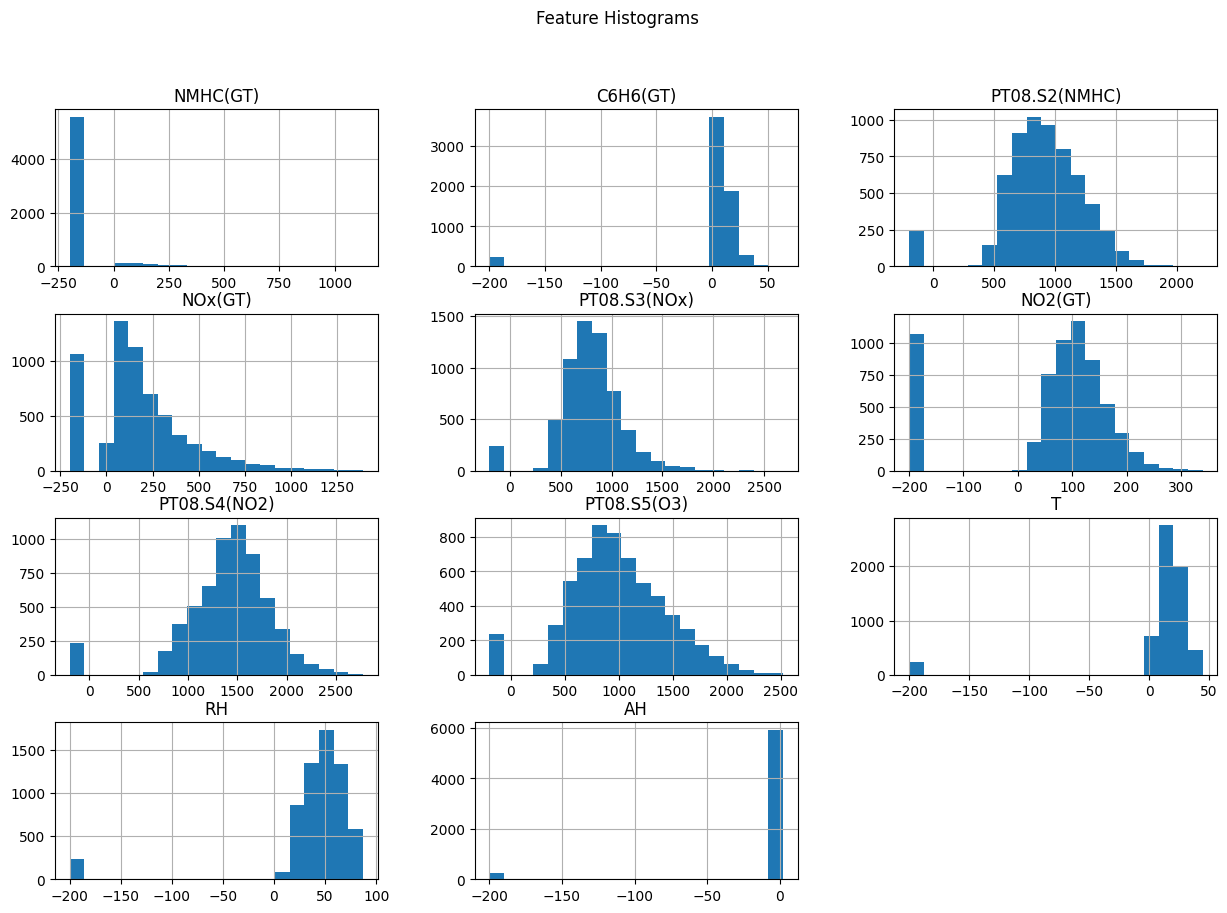

In [40]:
# 1. Plotting histograms of all the features

features.hist(bins=20, figsize=(15, 10))
plt.suptitle("Feature Histograms")
plt.show()

Q - Do all the features have normal distribution? Do you see any outlier values ? 

As seen from the histograms depicted above, all the features do not have a normal distribution. 
The NOx(GT) feature histogram is skewed to the left, and C6H6(GT) feature which is skewed to the right. 
There are also outlier values present in the data, for example the RH and T feature has a outlier value of -200, this value is far off from the other values of the feature which form a close normal distribution as shown in the respective feature histograms. 

In [41]:
#Normalize the features
scaler = StandardScaler()
features = pd.DataFrame(scaler.fit_transform(features), columns=features.columns)


Normalizing the data - 

Standardization technique can be used to normalize the features of the dataset. StandardScaler() from scikit learn package can be used for normalization. In this technique, the mean and standard deviation of each feature is computed, then the values of the feature are standardized by subtracting with the mean and dividing with the standard deviation. The resulting values will have 0 mean and a standard deviation of 1. With this normalization of the data, it becomes more sutaible to be used for machine learning problems. 

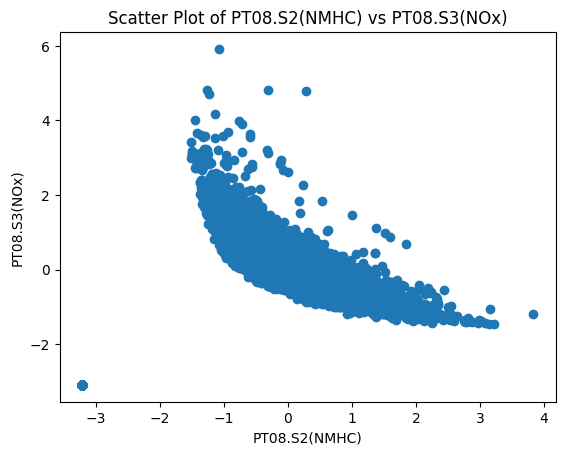

In [42]:
# 2. Scatter plot of 2 features 
plt.scatter(features["PT08.S2(NMHC)"], features["PT08.S3(NOx)"])

plt.title('Scatter Plot of PT08.S2(NMHC) vs PT08.S3(NOx)')
plt.xlabel('PT08.S2(NMHC)')
plt.ylabel('PT08.S3(NOx)')
plt.show()

In [43]:
correlation_coefficient = features["PT08.S2(NMHC)"].corr(features["PT08.S3(NOx)"])
print(correlation_coefficient)

-0.0793360891933934


Q - Is there a high correlation between the features ? 

Picked two features - 'PT08.S2(NMHC)' and 'PT08.S3(NOx)' , the scatter plot indicates there is a negative correlation between the two features. The correlation value is close to 0 which indicates that the correlation is weak / no corelation betwene the two features. 

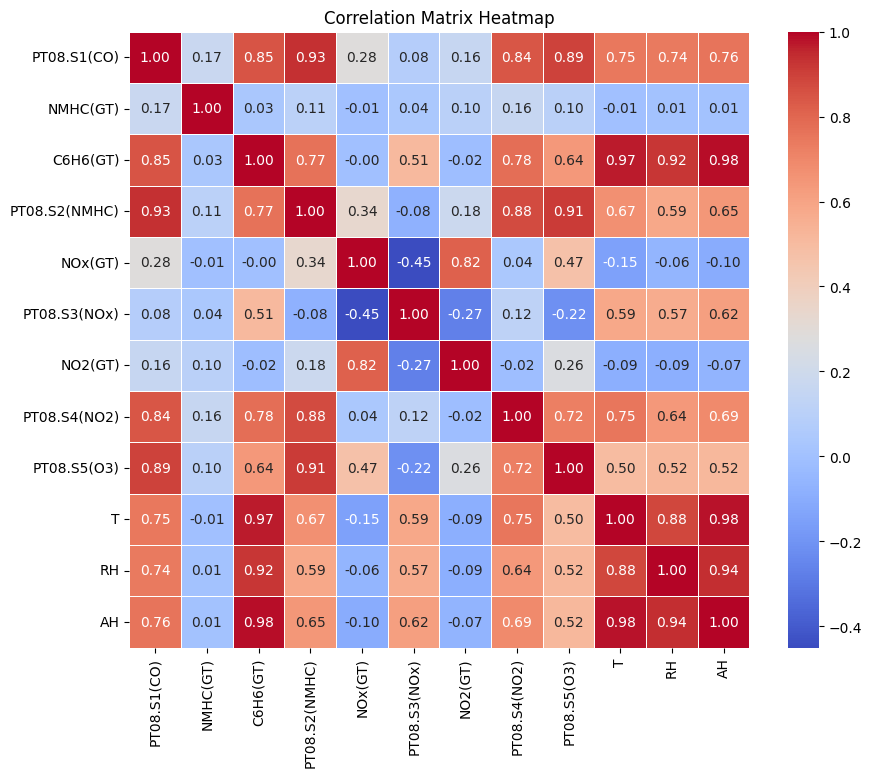

In [44]:
# 3. Pearon's correlation coefficient matrix to be visualized as a heatmap

columns = train_data.iloc[:, 0:12]
correlation_matrix = columns.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

Q - Discuss potential associations between the considered variables depicted in the corelation heatmap above ? 

The heatmap above shows the corelations between the features of the training dataset. Feature pairs with positive values closer to 1 are positively corelated, eg - features 'T' and 'AH' with a corelation of 0.98 and features 'T' and 'C6H6(GT)' and 'AH' with a corelation of 0.98. Feature pairs with negative values closer to -1 are strongly negatively corelated, that is, one feature is inversely dependent on the other. Eg - features 'NOx(GT)' and 'PT08.S3(NOx)' with a corelation of -0.45 which is closer to -1 are negatively corelated. 
Feature corelations with values closer to 0 such as : 0.01 (corealtion between feature RH and NMHC(GT)) and -0.02(corelation between features PT08.S4(NO2) and NO2(GT)), these feature pairs have weak corelations / no linear corelation between them. 

Overall, we can figure out the associations between the features using the heatmap above - 
Feature pairs with positive values are positively corelated. If the positive value is closer to 1 the features are strongly corelated to each other. These are depicted in warmer shades in the heatmap. 
Feature pairs with negative values are negatively corelated. If the negative value is closer to -1 the features are strongly corelated to each other. These are depicted in cooler (blue) shades in the heatmap. 
Feature pairs with negative or positive values but very close to 0 are weakly corelated with each other. These are depicted in light blue (almost white) colour in the heatmap. 

### (c) Linear Regression Implementation

In [45]:
# computing betas (intercept + slope terms)
def linear_regression(X,y):
    beta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    return beta

# adding extra column for beta0 (intercept term)
def add_intercept(X):
    return np.c_[np.ones(X.shape[0]), X]

def linear_regression_predict(X, beta):
    return np.dot(X, beta)


In [46]:
features_with_bias = add_intercept(features)

### (d) Logistic Regression Implementation

In [47]:
#creating binary labels 
labels_with_binary = labels.apply(lambda x: 1 if x > 1000 else 0)

In [48]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def logistic_regression(X_train, y_train, learning_rate=0.01, epochs=1000):
    
    
    betas = np.zeros(X_train.shape[1])

    for epoch in range(epochs):
        
        z = np.dot(X_train, betas)
        h = sigmoid(z)

        gradient = np.dot(X_train.T, (h - y_train)) / y_train.size
        betas -= learning_rate * gradient

    return betas

def logistic_regression_predict(X, beta):
    z = np.dot(X, beta)
    h = sigmoid(z)

    # Round to the nearest integer to get binary predictions
    predictions = np.round(h)

    return predictions

### (e) Result Analysis - Linear Regression

In [49]:

def cross_validation_linear_regression(features, labels, folds=5):
    n = len(labels)
    fold_size = n // folds
    
    rmse_values = []
    
    for i in range(folds):
        start = i * fold_size
        end = (i + 1) * fold_size
        
        # Validation dataset 
        val_feature = features[start:end, :]
        val_label = labels[start:end]
            
        # Training dataset (rest of the dataset)
        train_feature = np.concatenate([features[:start, :], features[end:, :]])
        train_label = np.concatenate([labels[:start], labels[end:]])
        
        betas = linear_regression(train_feature, train_label)
    
        label_pred = linear_regression_predict(val_feature, betas)
        
        rmse = np.sqrt(mean_squared_error(val_label, label_pred))        
        rmse_values.append(rmse)
        
    return rmse_values, betas


In [50]:

rmse_values, betas_linear_regression = cross_validation_linear_regression(features_with_bias, labels)
avg_rmse = np.mean(rmse_values)
std_dev_rmse = np.std(rmse_values)

print("RMSE values: ", rmse_values)
print("Average RMSE: ", avg_rmse)
print("Standard Deviation of RMSE: ", std_dev_rmse)


RMSE values:  [70.1242214923695, 72.96008688643256, 67.94071553620623, 72.52655478014327, 72.59085808019124]
Average RMSE:  71.22848735506855
Standard Deviation of RMSE:  1.92708674418975


Q - Do you see big change across different folds? How can you use the coefficients of the model to find the most informative results ? 

Ans - Across the 5 folds of the training data, there is not much change in the RSME values. The standard deviation of the RSME values for the 5 folds is 1.92 which does not show a big change across the different folds. 

With the coefficients of the model indicates the importance of the feature in the model to predict the value of the target variable. 
Magnitude of the coefficient shows the importance of the feature in the model , we would want to focus more on features which have coefficients of a higher absolute value. The sign of the coeffient can indicate whether the feature has a positive impact or a negative impact on the target variable. These methods can be used to determine informative results from the coefficients to know which features affect the target variable more than than other features. 

### (f)  Result Analysis - Logistic Regression

In [51]:
def cross_validation_logistic_regression(features, labels, folds=5):
    n = len(labels)
    fold_size = n // folds

    accuracy_values = []
    precision_values = []
    recall_values = []
    f1_score_values = []

    for i in range(folds):
        start= i * fold_size
        end = (i + 1) * fold_size

        # Validation set
        features_val= features[start:end]
        label_val = labels[start:end]

        # Training set
        features_train = np.concatenate((features[:start], features[end:]))
        label_train = np.concatenate((labels[:start], labels[end:]))

        betas = logistic_regression(features_train, label_train)

        label_pred = logistic_regression_predict(features_val, betas)

        accuracy, precision, recall, f1_score = evaluate_metrics(label_val, label_pred)

        accuracy_values.append(accuracy)
        precision_values.append(precision)
        recall_values.append(recall)
        f1_score_values.append(f1_score)

    return accuracy_values, precision_values, recall_values, f1_score_values, betas


def evaluate_metrics(y_true, y_pred):
    tp = np.sum((y_true == 1) & (y_pred == 1))
    tn = np.sum((y_true == 0) & (y_pred == 0))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    fn = np.sum((y_true == 1) & (y_pred == 0))

    accuracy = (tp + tn) / (tp + tn + fp + fn) if (tp + tn + fp + fn) != 0 else 0
    precision = tp / (tp + fp) if (tp + fp) != 0 else 0
    recall = tp / (tp + fn) if (tp + fn) != 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

    return accuracy, precision, recall, f1_score

In [52]:
accuracy_values, precision_values, recall_values, f1_score_values, betas_logistic_regression = cross_validation_logistic_regression(features_with_bias, labels_with_binary)
average_accuracy = np.mean(accuracy_values)
std_dev_accuracy = np.std(accuracy_values)

average_precision = np.mean(precision_values)
std_dev_precision = np.std(precision_values)

average_recall = np.mean(recall_values)
std_dev_recall = np.std(recall_values)

average_f1_score = np.mean(f1_score_values)
std_dev_f1_score = np.std(f1_score_values)

print("Accuracy values:", accuracy_values)
print("Average Accuracy:", average_accuracy)
print("Standard Deviation of Accuracy:", std_dev_accuracy)

print("Precision values:", precision_values)
print("Average Precision:", average_precision)
print("Standard Deviation of Precision:", std_dev_precision)

print("Recall values:", recall_values)
print("Average Recall:", average_recall)
print("Standard Deviation of Recall:", std_dev_recall)

print("F1 Score values:", f1_score_values)
print("Average F1 Score:", average_f1_score)
print("Standard Deviation of F1 Score:", std_dev_f1_score)

Accuracy values: [0.9084278768233387, 0.9141004862236629, 0.8946515397082658, 0.880064829821718, 0.8905996758508914]
Average Accuracy: 0.8975688816855752
Standard Deviation of Accuracy: 0.012285636083142457
Precision values: [0.9294781382228491, 0.9473684210526315, 0.9295774647887324, 0.9254571026722925, 0.9216216216216216]
Average Precision: 0.9307005496716254
Standard Deviation of Precision: 0.008837354997396032
Recall values: [0.9127423822714681, 0.9095744680851063, 0.8918918918918919, 0.8738379814077025, 0.8985507246376812]
Average Recall: 0.89731948965877
Standard Deviation of Recall: 0.013931303597366981
F1 Score values: [0.9210342417889588, 0.9280868385345997, 0.9103448275862069, 0.8989071038251366, 0.9099399599733156]
Average F1 Score: 0.9136625943416435
Standard Deviation of F1 Score: 0.01004977701137694


Q - Do you see big changes across the different folds ? 

The standard deviation of the metrics - Accuracy, Precision, Recall and F1 Score in the 5 folds is 0.0122, 0.00883, 0.01393, and 0.01004 respectively. These values are small and indicate that is no big change across the folds. This indicates that the model performance is consistent across the folds. 

### (g) ROC Curve - Logistic Regression

1. Performing 5-fold cross validation using the Logistic Regression model from sklearn

In [53]:

model = LogisticRegression()

In [54]:
def logistic_regression_model(X_train, y_train, X_val, y_val, i):
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)

    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)

    fpr, tpr, _ = roc_curve(y_val, y_pred)
    auc_score = auc(fpr, tpr)
    
    plt.plot(fpr, tpr, label=f'Fold {i + 1} (AUC = {auc_score:.2f})')
    

    return accuracy, precision, recall, f1, auc_score

def cross_validation_logistic_regression(features, labels, folds=5):
    n = len(labels)
    fold_size = n // folds

    accuracy_values = []
    precision_values = []
    recall_values = []
    f1_score_values = []
    auc_values = []

    for i in range(folds):
        start= i * fold_size
        end = (i + 1) * fold_size

        # Validation set
        feature_val = features[start:end]
        label_val =  labels[start:end]

        # Training set
        feature_train = np.concatenate((features[:start], features[end:]), axis=0)
        label_train = np.concatenate((labels[:start], labels[end:]), axis=0)

        accuracy, precision, recall, f1, auc_score = logistic_regression_model(feature_train, label_train, feature_val, label_val,i)

        accuracy_values.append(accuracy)
        precision_values.append(precision)
        recall_values.append(recall)
        f1_score_values.append(f1)
        auc_values.append(auc_score)

    return accuracy_values, precision_values, recall_values, f1_score_values, auc_values



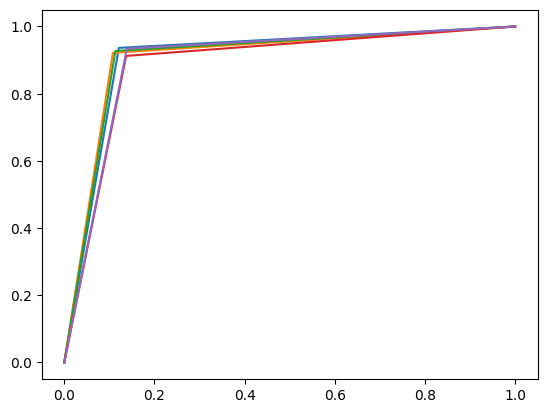

In [55]:
accuracy_values, precision_values, recall_values, f1_score_values, auc_values = cross_validation_logistic_regression(features_with_bias, labels_with_binary)

In [56]:
#Computing the area under the curve for each fold 
for i in range(len(auc_values)):
    print(f"AUC for fold {i + 1}: {auc_values[i]}")

AUC for fold 1: 0.9075971693213296
AUC for fold 2: 0.9068293678820516
AUC for fold 3: 0.9068333515701937
AUC for fold 4: 0.8875682301977124
AUC for fold 5: 0.8975882393731365


In [57]:
average_auc = np.mean(auc_values)
print("Average AUC:", average_auc)

Average AUC: 0.9012832716688848


Q - Is the result consistent with the results obtained from the logistic regression model? 

Ans - The AUC obtained is similar to the accuracy obtained in the implemented logistic regression model. Hence, the results of the model generated by the Logistic Regression library is consistent with the results obtained from the logistic regression model. 

### (h) Inference - Linear and Logistic Regression

In [58]:
test_data = pd.read_csv('data_test.csv')
test_data = test_data.drop(test_data.columns[0], axis=1)
print(test_data.shape)
print(test_data.head())


(3221, 11)
   NMHC(GT)  C6H6(GT)  PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  \
0    -200.0       8.0          898.0    122.0         933.0    105.0   
1    -200.0      19.4         1281.0   -200.0         774.0   -200.0   
2    -200.0       9.9          975.0    349.0         638.0    223.0   
3    -200.0      12.7         1075.0    103.0         749.0     98.0   
4    -200.0       2.9          647.0    131.0        1054.0     85.0   

   PT08.S4(NO2)  PT08.S5(O3)     T    RH      AH  
0        1594.0       1098.0  17.0  51.7  0.9914  
1        1952.0       1324.0  20.8  43.6  1.0614  
2        1243.0       1064.0   5.6  74.6  0.6826  
3        1690.0       1022.0  31.7  21.5  0.9902  
4         962.0        828.0   8.4  54.5  0.6022  


In [59]:
test_data = test_data.dropna()

In [60]:
test_data = scaler.fit_transform(test_data)

In [61]:
test_data_with_bias = add_intercept(test_data) 

 1. Using the trained linear regression model to predict the value of the label PT08.S1(CO) for the test data

In [62]:
y_pred_linear_regression = linear_regression_predict(test_data_with_bias, betas_linear_regression)


 2. Using the trained logistic regression model to predict the value of the label PT08.S1(CO) for the test data

In [63]:
y_pred_logistic_regression = logistic_regression_predict(test_data_with_bias, betas_logistic_regression)

3. Saving the linear and logistic regression predictions in a CSV file 

In [64]:
predictions_df = pd.DataFrame({
    'pred_linear': y_pred_linear_regression,
    'pred_logistic': y_pred_logistic_regression
})

predictions_df.to_csv('Neha_Manghnani_preds.csv', index=False)
